# Practica 2 (Regresión logística)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

In [3]:
data = carga_csv('ex2data1.csv')

X = data[:, :-1]
np.shape(X) # (100, 2)

Y = data[:, -1]
np.shape(Y) # (100,)

m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

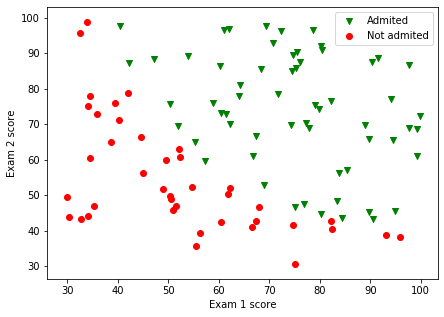

In [4]:
plt.figure(figsize=(7,5))

pos = np.where(Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='v', c='g', label='Admited')

pos = np.where(Y == 0)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='r', label='Not admited')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    cost = (-1 / len(X)) * ( np.matmul(np.log(H).T, Y) + np.matmul(np.log(1-H).T, (1-Y)))
    return cost

def gradient(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    return ( (1/len(X)) * np.matmul(X.T, H - Y) )

In [6]:
Theta = np.zeros(np.shape(X[1]))

In [7]:
print(cost(Theta,X,Y))
print(gradient(Theta, X, Y))

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [8]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X, Y))
theta_opt = result[0]

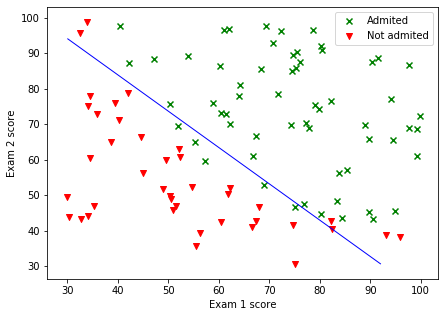

In [9]:
def pinta_frontera_recta(theta, X, Y):
    plt.figure(figsize=(7,5))
    
    pos = np.where(Y == 1)
    plt.scatter(X[pos, 1], X[pos, 2], marker='x', c='g', label='Admited')
    
    pos = np.where(Y == 0)
    plt.scatter(X[pos,1], X[pos,2], marker='v', c='r', label='Not admited')

    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))

    h = h.reshape(xx1.shape)
    
    plt.legend(loc = 'upper right')
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    
    # el cuarto parámetro es el valor de z cuya frontera se quiere pinta
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='blue')
    plt.savefig("frontera.pdf")
    plt.show()
    plt.close()


pinta_frontera_recta(theta_opt, X, Y)